<a href="https://colab.research.google.com/github/MoMus2000/All-things-autoencoder/blob/master/Country_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
scaler = MinMaxScaler()
df = pd.read_csv('/content/datasets_721951_1255613_Country-data.csv')
x = df['country']
del df['country']
scaled_df = scaler.fit_transform(df)
print(scaled_df.shape)

(12, 9)


In [84]:
encoder = Sequential()
encoder.add(Dense(7,input_shape=[9],activation='relu'))
encoder.add(Dense(6,activation='relu'))
encoder.add(Dense(5,activation='relu'))
encoder.add(Dense(4,activation='relu'))

decoder = Sequential()
decoder.add(Dense(4,input_shape=[4],activation='relu'))
decoder.add(Dense(4,activation='relu'))
decoder.add(Dense(5,activation='relu'))
decoder.add(Dense(6,activation='relu'))
decoder.add(Dense(7,activation='relu'))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(9,activation='relu'))

auto_encoder=Sequential([encoder,decoder])
auto_encoder.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.01))


In [85]:
history = auto_encoder.fit(scaled_df,scaled_df,epochs=400)


Epoch 1/400
1/1 [==============================] - 0s 1ms/step - loss: 0.2498
Epoch 2/400
1/1 [==============================] - 0s 2ms/step - loss: 0.2329
Epoch 3/400
1/1 [==============================] - 0s 2ms/step - loss: 0.2177
Epoch 4/400
1/1 [==============================] - 0s 1ms/step - loss: 0.2049
Epoch 5/400
1/1 [==============================] - 0s 1ms/step - loss: 0.1968
Epoch 6/400
1/1 [==============================] - 0s 955us/step - loss: 0.1951
Epoch 7/400
1/1 [==============================] - 0s 1ms/step - loss: 0.1949
Epoch 8/400
1/1 [==============================] - 0s 1ms/step - loss: 0.1913
Epoch 9/400
1/1 [==============================] - 0s 2ms/step - loss: 0.1854
Epoch 10/400
1/1 [==============================] - 0s 2ms/step - loss: 0.1795
Epoch 11/400
1/1 [==============================] - 0s 2ms/step - loss: 0.1751
Epoch 12/400
1/1 [==============================] - 0s 2ms/step - loss: 0.1721
Epoch 13/400
1/1 [==============================] - 0s 2ms/

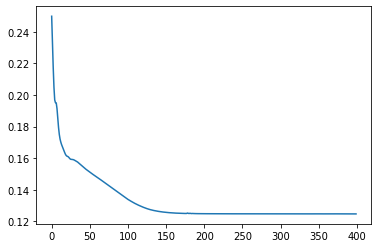

In [86]:
plt.plot(history.history['loss'])

In [87]:
encoded_2_dim = encoder.predict(scaled_df)

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_img_label = tsne_model.fit_transform(encoded_2_dim)

import pandas as pd
import numpy as np
tsne_df = pd.DataFrame(tsne_img_label, columns=['x', 'y'])
tsne_df['image_label'] = x


[t-SNE] Computing 11 nearest neighbors...
[t-SNE] Indexed 12 samples in 0.000s...
[t-SNE] Computed neighbors for 12 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 12 / 12
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.919304
[t-SNE] KL divergence after 1000 iterations: 0.288902


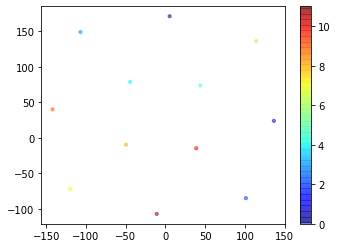

In [89]:
import matplotlib.pyplot as plt
colors = [x for x in range(0,12)]
# %matplotlib inline
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
cmap = plt.cm.get_cmap('jet')
plt.scatter(tsne_df['x'], tsne_df['y'], 
            alpha=0.5,c =colors, cmap=cmap, s=10)
plt.colorbar()